In [1]:
from PIL import Image
import numpy as np
import pylab

In [2]:
pil_im = Image.open("./images/empire.jpg")

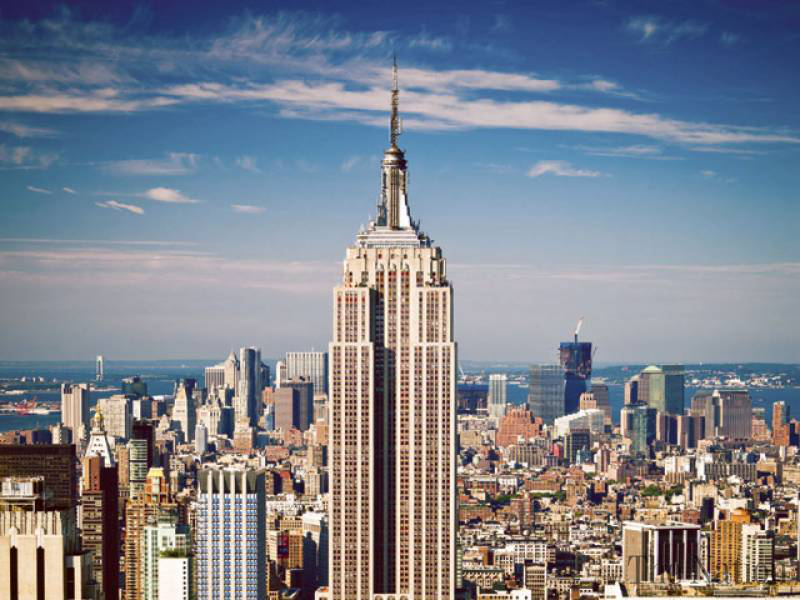

In [3]:
pil_im

### Задание 1
***
*Применить к изображению гауссово размытие. Нарисовать изолинии для возрастающих значений $\sigma$. Что происходит? Можно ли объяснить результат?*

__Решение:__

Гауссово размытие:

$$I_\sigma=I*G_\sigma,$$

где * - операция свертки, $G_\sigma$ - двумерное гауссово ядро со стандартным отклонением $\sigma$:

$$G_\sigma=\frac{1}{2\pi\sigma}e^{-(x^2+y^2)/2\sigma^2}$$

In [4]:
from scipy.ndimage import filters

im = np.array(pil_im.convert('L'))
list_images = []
sigma_list = range(1, 20, 2)
for sigma in sigma_list:
    im_gauss = filters.gaussian_filter(im, sigma)
    list_images.append(im_gauss)

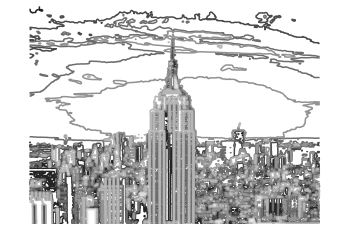

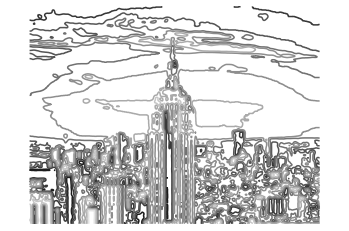

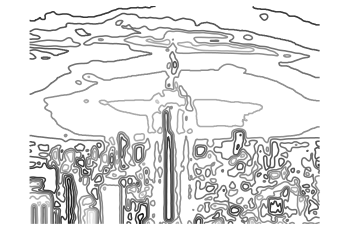

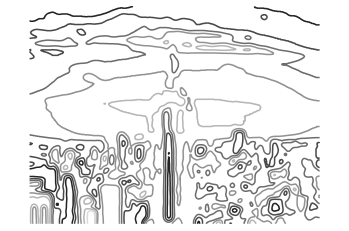

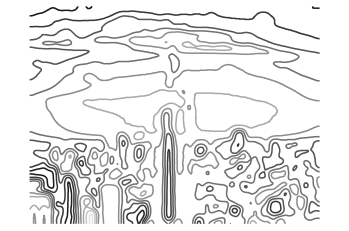

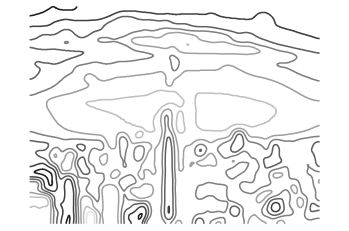

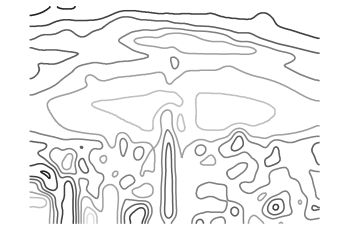

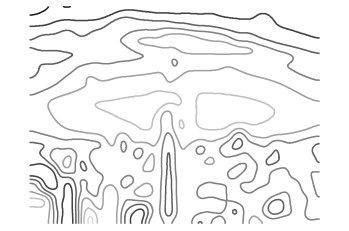

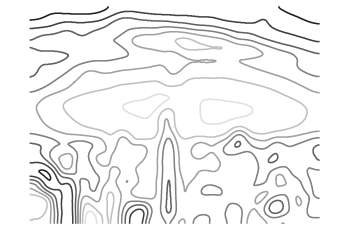

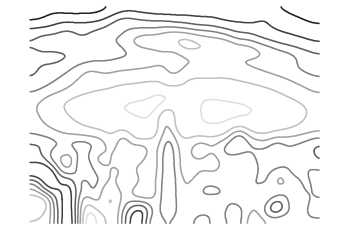

In [5]:
for image in list_images:
    pylab.figure()
    pylab.gray()
    pylab.contour(image, origin='image')
    pylab.axis('equal')
    pylab.axis('off')

Поскольку изображения становятся размытее с увеличением $\sigma$, то и контуры элементов становятся нечеткими.

### Задание 2
***
*Реализовать операцию нерезкого маскирования, для чего сначала размыть изображение, а затем вычесть размытое изображение из исходного. Попробовать применить операцию к полутоновому и цветному изображению.*

__Решение:__

#### Полутоновое изображение

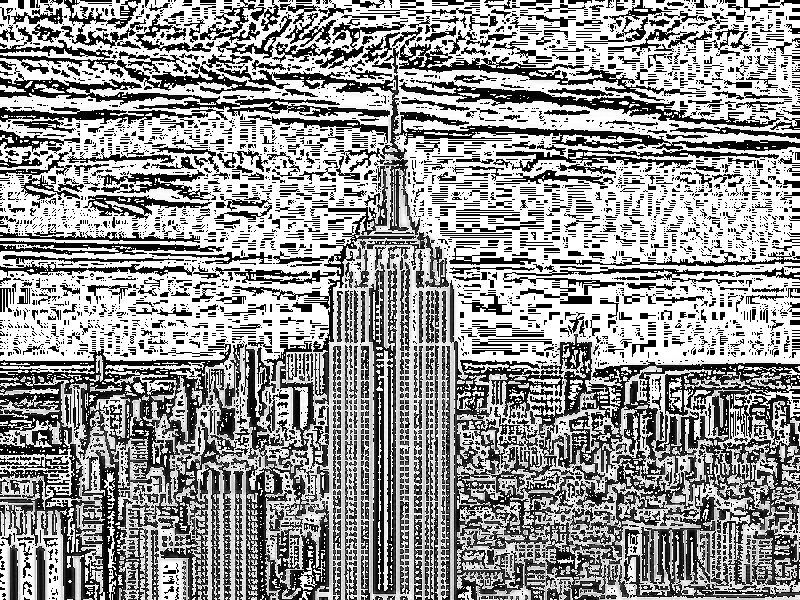

In [6]:
from matplotlib import cm

im_gray = np.array(pil_im.convert('L'))
im_gray_gauss = filters.gaussian_filter(im_gray, 2)
new_im_gray = im_gray_gauss - im_gray

Image.fromarray(new_im_gray)

#### Цветное изображение

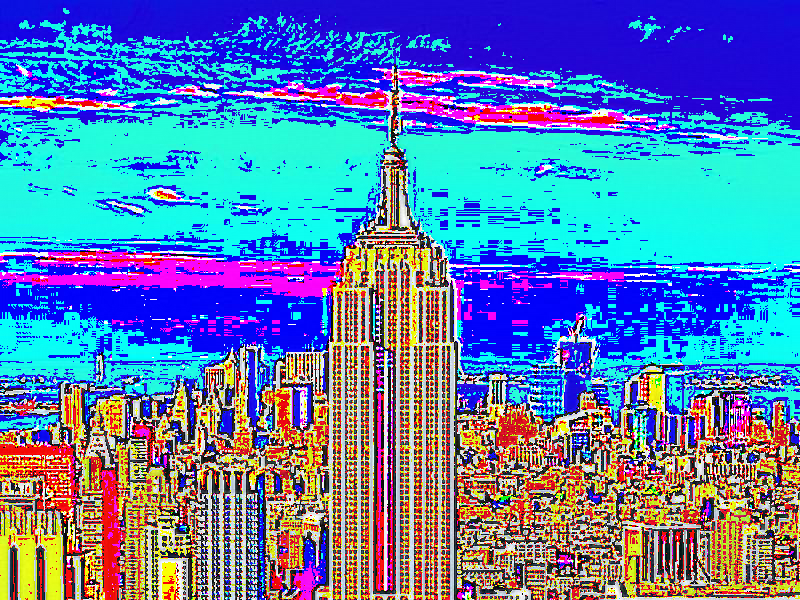

In [7]:
im_color = pil_im
im_color_gauss = filters.gaussian_filter(im_color, 2)
new_im_color = im_color_gauss - im_color

Image.fromarray(new_im_color)

### Задание 3
***

*Альтернативой выравниванию гистограммы является метод нормировки изображения с помощью вычисления изображения-частного. Оно получается путем деления изображения на его размытый вариант $I/(I*G_\sigma).$ Реализовать эту операцию и протестировать на каких-нибудь примерах.*

__Решение:__

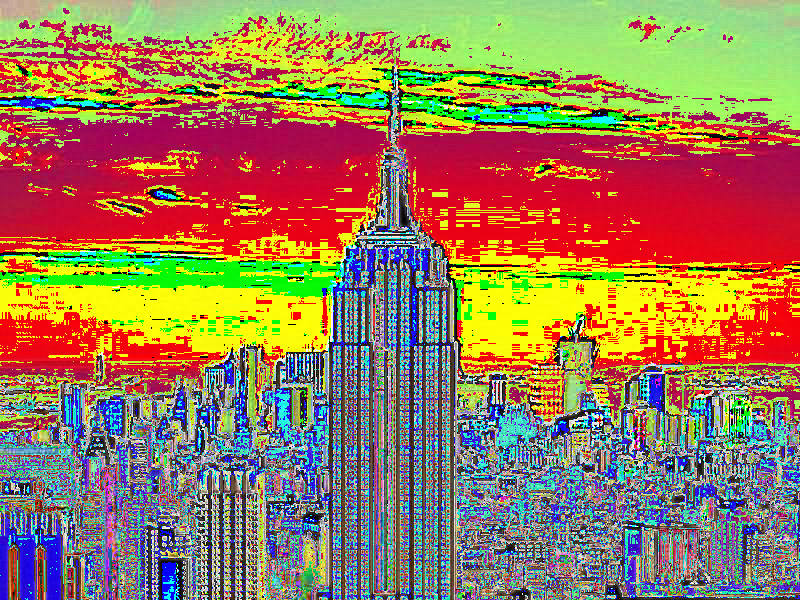

In [8]:
im = np.array(pil_im)
im_filter = Image.fromarray(filters.gaussian_filter(im, 2))

Image.fromarray(np.uint8(im/im_filter * 255))

### Задание 4
***
*Написать функцию, которая находит контуры простых объектов внутри изображения (например, квадрата на белом фоне) с помощью градиентов.*

__Решение:__

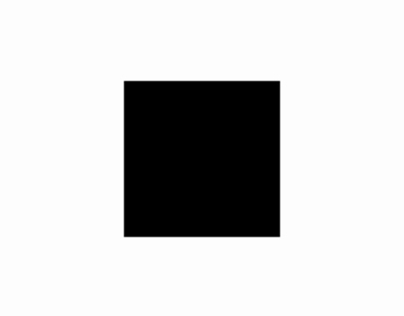

In [19]:
Image.open('./images/square.jpg')

In [38]:
def get_contour(image: Image) -> Image:
    image = np.array(image.convert('L'))
    
    imx = np.zeros(image.shape)
    filters.sobel(image, 1, imx)
    
    imy = np.zeros(image.shape)
    filters.sobel(image, 0, imy)
    
    magnitude = np.sqrt(imx**2+imy**2)
    
    return Image.fromarray(255 - np.uint8(magnitude))

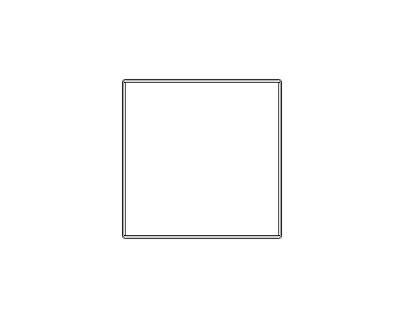

In [39]:
get_contour(Image.open('./images/square.jpg'))

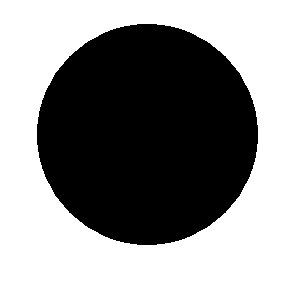

In [40]:
Image.open('./images/circle.jpg')

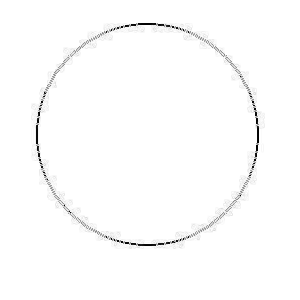

In [41]:
get_contour(Image.open('./images/circle.jpg'))

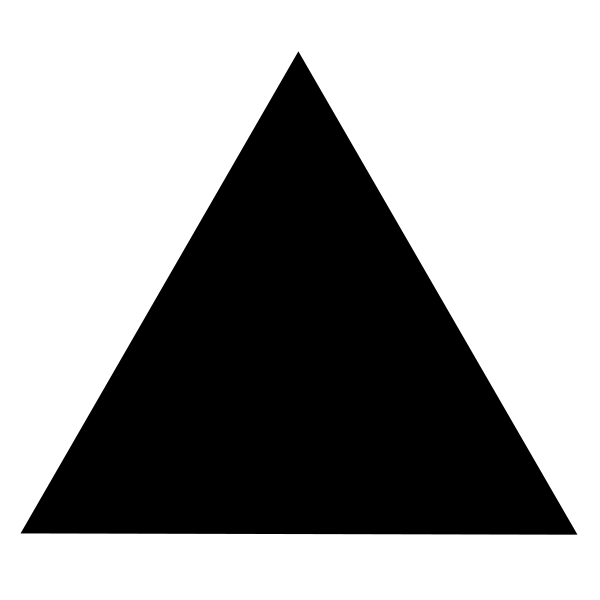

In [43]:
Image.open('./images/triangle.png')

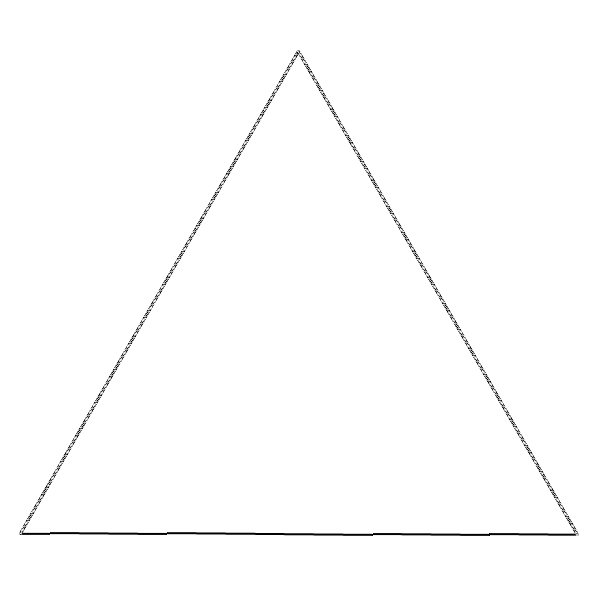

In [42]:
get_contour(Image.open('./images/triangle.png'))